### Loading the dataset

In [1]:
import seaborn as sns
df = sns.load_dataset('titanic')
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


### Getting the rows and columns count

In [2]:
df.shape

(891, 15)

### Counting the NaN values

In [3]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### Dropping the unnecessary columns and NaN valued rows

In [4]:
df = df.drop(['deck', 'embark_town', 'alive', 'alone', 'adult_male', 'who'], axis="columns")

In [5]:
df = df.dropna(subset =['embarked', 'age'])

In [6]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class
0,0,3,male,22.0,1,0,7.2500,S,Third
1,1,1,female,38.0,1,0,71.2833,C,First
2,1,3,female,26.0,0,0,7.9250,S,Third
3,1,1,female,35.0,1,0,53.1000,S,First
4,0,3,male,35.0,0,0,8.0500,S,Third


In [7]:
X = df.drop(["survived"], axis="columns")
Y = df.drop(["pclass", "sex", "age", "sibsp" ,"parch","fare","embarked","class"], axis="columns")


In [8]:
X.head(10)

,pclass,sex,age,sibsp,parch,fare,embarked,class
0,3,male,22.0,1,0,7.2500,S,Third
1,1,female,38.0,1,0,71.2833,C,First
2,3,female,26.0,0,0,7.9250,S,Third
3,1,female,35.0,1,0,53.1000,S,First
4,3,male,35.0,0,0,8.0500,S,Third
6,1,male,54.0,0,0,51.8625,S,First
7,3,male,2.0,3,1,21.0750,S,Third
8,3,female,27.0,0,2,11.1333,S,Third
9,2,female,14.0,1,0,30.0708,C,Second
10,3,female,4.0,1,1,16.7000,S,Third


### Converting the Categorical values to Numerical Values

In [10]:
labelencoder=LabelEncoder()
for column in X.columns:
    X[column] = labelencoder.fit_transform(X[column])

In [11]:
X.head()

,pclass,sex,age,sibsp,parch,fare,embarked,class
0,2,1,28,1,0,16,2,2
1,0,0,51,1,0,180,0,0
2,2,0,34,0,0,32,2,2
3,0,0,47,1,0,163,2,0
4,2,1,47,0,0,34,2,2


### Scaling the values of Input Data

In [13]:
from sklearn import preprocessing
import pandas as pd
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.head(5)

,pclass,sex,age,sibsp,parch,fare,embarked,class
0,1.0,1.0,0.321839,0.2,0.0,0.073394,1.0,1.0
1,0.0,0.0,0.586207,0.2,0.0,0.825688,0.0,0.0
2,1.0,0.0,0.390805,0.0,0.0,0.146789,1.0,1.0
3,0.0,0.0,0.540230,0.2,0.0,0.747706,1.0,0.0
4,1.0,1.0,0.540230,0.0,0.0,0.155963,1.0,1.0


In [14]:
X = X_scaled_df.copy()
X.head(5)

,pclass,sex,age,sibsp,parch,fare,embarked,class
0,1.0,1.0,0.321839,0.2,0.0,0.073394,1.0,1.0
1,0.0,0.0,0.586207,0.2,0.0,0.825688,0.0,0.0
2,1.0,0.0,0.390805,0.0,0.0,0.146789,1.0,1.0
3,0.0,0.0,0.540230,0.2,0.0,0.747706,1.0,0.0
4,1.0,1.0,0.540230,0.0,0.0,0.155963,1.0,1.0


### Splitting the dataset to train test dataset

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y ,test_size=0.3, random_state=1)

In [16]:
X.shape

(712, 8)

In [17]:
X_train.shape

(498, 8)

### Importing the models

In [20]:
from sklearn.svm import SVC
model_SVC = SVC(kernel = 'linear')
model_SVC.fit(X_train, Y_train.values.ravel())

SVC(kernel='linear')

In [21]:
from sklearn.neural_network import MLPClassifier
nnc = MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)
nnc.fit(X_train, Y_train.values.ravel())

MLPClassifier(hidden_layer_sizes=7, max_iter=10000)

In [22]:
from sklearn.ensemble import RandomForestClassifier
model_RFC = RandomForestClassifier(n_estimators = 50, criterion = 'entropy')
model_RFC.fit(X_train, Y_train.values.ravel())

RandomForestClassifier(criterion='entropy', n_estimators=50)

### Checking the accuracies of SVC, MLPClassifier and Random Forest

In [23]:
from sklearn.metrics import accuracy_score
Y_pred = model_SVC.predict(X_test) 
acc_SVC = accuracy_score(Y_pred, Y_test)
acc_SVC

0.7757009345794392

In [24]:
Y_pred = nnc.predict(X_test) 
acc_nnc = accuracy_score(Y_pred, Y_test)
acc_nnc

0.7897196261682243

In [25]:
Y_pred = model_RFC.predict(X_test) 
acc_model_RFC = accuracy_score(Y_pred, Y_test)
acc_model_RFC

0.7570093457943925

### Plotting the accuracies


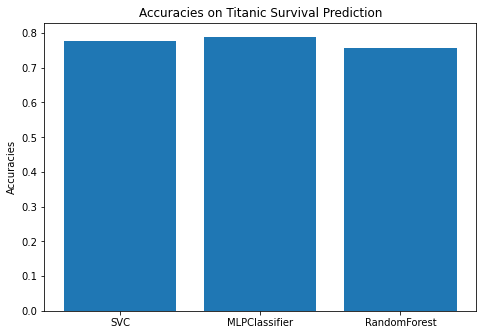

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
mdl = ['SVC', 'MLPClassifier', "RandomForest"]
acc = [acc_SVC, acc_nnc, acc_model_RFC]
ax.bar(mdl,acc)
plt.ylabel("Accuracies")
plt.title("Accuracies on Titanic Survival Prediction")
plt.show()